In [1]:
import pandas as pd
import ast
from sklearn.manifold import TSNE
import itertools
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# events_df = pd.read_csv('new_grad_cam_2f_events_correct_predictions.csv')
events_df = pd.read_csv('new_grad_cam_plus_2f_events_correct_predictions.csv')
events_df = events_df.drop("Unnamed: 0", axis=1)
events_df.shape

(3262, 7)

In [24]:
np.unique(events_df['Actual Label'])

array(['airport', 'bus', 'metro', 'metro_station', 'park',
       'public_square', 'shopping_mall', 'street_pedestrian',
       'street_traffic', 'tram'], dtype=object)

In [25]:
events_df.head()

Filename       Actual Label  \
0   audio/street_pedestrian-lyon-1162-44093-a.wav  street_pedestrian   
1             audio/metro-prague-1163-44094-a.wav              metro   
2               audio/park-milan-1164-44095-a.wav               park   
3  audio/street_pedestrian-milan-1165-44096-a.wav  street_pedestrian   
4     audio/street_traffic-milan-1166-44097-a.wav     street_traffic   

     Predicted Label                                      events_before  \
0  street_pedestrian  ['Speech', 'Animal', 'Clip-clop', 'Horse', 'Bi...   
1              metro  ['Train', 'Vehicle', 'Field recording', 'Railr...   
2               park  ['Speech', 'Silence', 'Caw', 'Animal', 'Crow',...   
3  street_pedestrian  ['Speech', 'Music', 'Vehicle', 'Train', 'Outsi...   
4     street_traffic  ['Vehicle', 'Train', 'Speech', 'Railroad car, ...   

                                        events_after    cam_pred_labels  \
0  ['Speech', 'Animal', 'Horse', 'Clip-clop', 'Bi...  street_pedestrian   
1  ['Vehicle', 'Explosion', 'Car', 'Field recordi...              metro   
2  ['Speech', 'Silence', 'Vehicle', 'Animal', 'Ou...               park   
3  ['Speech', 'Music', 'Vehicle', 'Animal', 'Clip...  street_pedestrian   
4  ['Vehicle', 'Silence', 'Car', 'Speech', 'Train...     street_traffic   

                                          not_common  
0                            {'Pigeon, dove', 'Coo'}  
1  {'Rumble', 'Aircraft', 'Railroad car, train wa...  
2                                          {'Music'}  
3    {'Rail transport', 'Railroad car, train wagon'}  
4                {'White noise', 'Ship', 'Aircraft'}

In [26]:
label_counts = events_df['Actual Label'].value_counts()
label_counts

Actual Label
bus                  367
street_traffic       362
park                 354
tram                 341
metro_station        334
metro                316
shopping_mall        314
airport              311
street_pedestrian    303
public_square        260
Name: count, dtype: int64

In [27]:
# All events list are stored as string, convert them to list 
events_df['events_before'] = events_df['events_before'].apply(ast.literal_eval)
events_df['events_after'] = events_df['events_after'].apply(ast.literal_eval)

In [28]:
#Get unique events

all_events_before = []
# Flatten the list of lists to a single list of events
all_events = [event for sublist in events_df['events_before'] for event in sublist if len(sublist) == 10]

# Get unique events
unique_events = set(all_events)
print("Total number of unique events before: ", len(unique_events))
# print("Unique events:", unique_events)

Total number of unique events before:  298


In [29]:
#Get unique events_after
# Flatten the list of lists to a single list of events
all_events = [event for sublist in events_df['events_after'] for event in sublist]

# Get unique events
unique_events_after = set(all_events)
print("Total number of unique events_after: ", len(unique_events_after))
# print("Unique events:", unique_events_after)

Total number of unique events_after:  295


In [30]:
final_events = set(list(unique_events)+list(unique_events_after))

In [31]:
len(final_events)

323

In [32]:
final_events_list = list(final_events)
import re
def preprocess_event(event):
    # Convert to lowercase
    event = event.lower()
    
    # Replace special characters with space
    event = re.sub(r'[^\w\s]', ' ', event)
    
    # Tokenize and join back
    event = ' '.join(event.split())
    
    return event

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
final_events_list

['thunderstorm',
 'computer keyboard',
 'squeak',
 'civil defense siren',
 'door',
 'breathing',
 'wood block',
 'chirp tweet',
 'snake',
 'emergency vehicle',
 'neigh whinny',
 'caw',
 'toot',
 'crunch',
 'domestic animals pets',
 'cattle bovinae',
 'field recording',
 'pizzicato',
 'narration monologue',
 'sigh',
 'scratching performance technique',
 'chirp tone',
 'piano',
 'ocean',
 'cello',
 'tearing',
 'patter',
 'water',
 'gobble',
 'ding',
 'fly housefly',
 'accelerating revving vroom',
 'traffic noise roadway noise',
 'conversation',
 'chewing mastication',
 'rustle',
 'rain',
 'inside large room or hall',
 'car alarm',
 'whir',
 'church bell',
 'crack',
 'drum',
 'biting',
 'meow',
 'gears',
 'sliding door',
 'children playing',
 'whistling',
 'bouncing',
 'bleat',
 'buzz',
 'race car auto racing',
 'finger snapping',
 'yip',
 'aircraft engine',
 'shuffling cards',
 'radio',
 'throat clearing',
 'honk',
 'engine starting',
 'shuffle',
 'canidae dogs wolves',
 'chuckle chortle

### Audios with no event difference before and after cam.

In [33]:
emptyset = events_df[events_df['not_common'] == 'set()']
emptyset.shape

(570, 7)

In [81]:
emptyset.head()

Filename   Actual Label Predicted Label  \
5   audio/metro_station-lyon-1167-44098-a.wav  metro_station   metro_station   
7         audio/airport-lyon-1169-44100-a.wav        airport         airport   
13            audio/bus-lyon-1177-44109-a.wav            bus             bus   
17          audio/metro-lyon-1181-44116-a.wav          metro           metro   
22            audio/bus-lyon-1186-44122-a.wav            bus             bus   

                                        events_before  \
5   [Speech, Music, Vehicle, Outside, urban or man...   
7   [Clip-clop, Horse, Animal, Speech, Train, Vehi...   
13  [Speech, Music, Vehicle, Bird, Pigeon, dove, S...   
17  [Speech, Vehicle, Music, Train, Animal, Rail t...   
22  [Sliding door, Vehicle, Cupboard open or close...   

                                         events_after cam_pred_labels  \
5   [Speech, Music, Vehicle, Outside, urban or man...   metro_station   
7   [Clip-clop, Horse, Animal, Speech, Train, Vehi...         airport   
13  [Speech, Music, Vehicle, Bird, Pigeon, dove, S...             bus   
17  [Speech, Vehicle, Music, Train, Animal, Rail t...           metro   
22  [Sliding door, Vehicle, Cupboard open or close...             bus   

   not_common  
5       set()  
7       set()  
13      set()  
17      set()  
22      set()

In [14]:
# Check distribution of scenes for the specified list
distribution = emptyset.groupby('Actual Label')['Filename'].count().to_frame()
distribution

Filename
Actual Label               
airport                  75
bus                      79
metro                    63
metro_station            43
park                    120
public_square            46
shopping_mall            47
street_pedestrian        52
street_traffic           12
tram                     72

In [15]:
distribution['Original_Count'] = label_counts

In [16]:
distribution

Filename  Original_Count
Actual Label                               
airport                  75             311
bus                      79             367
metro                    63             316
metro_station            43             334
park                    120             354
public_square            46             260
shopping_mall            47             314
street_pedestrian        52             303
street_traffic           12             362
tram                     72             341

/tmp/ipykernel_2644833/2716215193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distribution, x = 'Actual Label', y = 'Filename', palette="summer")


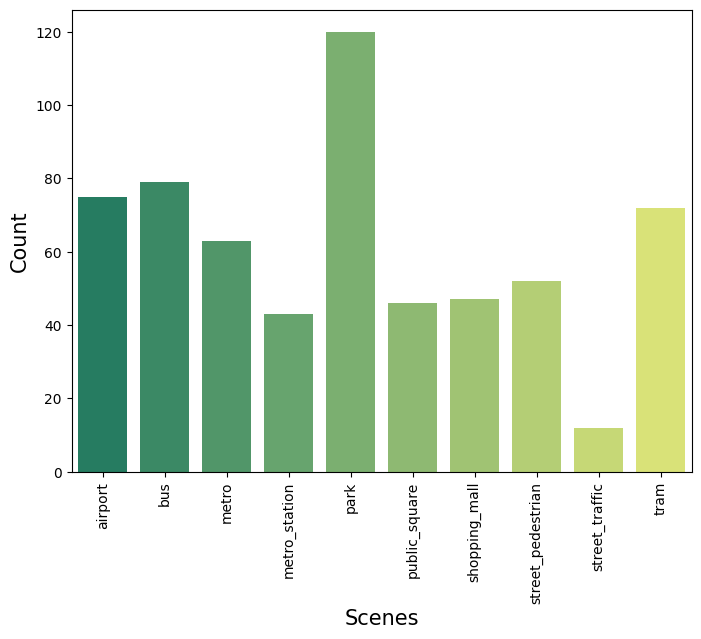

In [17]:
# Defining the plotsize
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.barplot(data=distribution, x = 'Actual Label', y = 'Filename', palette="summer")
plt.xlabel("Scenes", size=15)
plt.ylabel("Count", size=15)
plt.xticks(rotation=90)
plt.savefig('grad_cam_plus_2f_emptysets.png')
plt.show()

Highest focus on same events is for street and park, since there might not be that differential events.

#### Checking the audios with same set of events

In [18]:
audio_list = emptyset[emptyset['Actual Label'] == 'street_traffic'][['Filename','events_before','events_after']]

In [19]:
audio_list

Filename  \
203     audio/street_traffic-milan-1166-44360-a.wav   
311     audio/street_traffic-milan-1166-44493-a.wav   
379    audio/street_traffic-lisbon-1171-44575-a.wav   
459    audio/street_traffic-lisbon-1171-44671-a.wav   
1105     audio/street_traffic-lyon-1220-45479-a.wav   
1153   audio/street_traffic-prague-1193-45543-a.wav   
2887   audio/street_traffic-helsinki-269-8186-a.wav   
2943     audio/street_traffic-london-271-8250-a.wav   
2977      audio/street_traffic-paris-272-8290-a.wav   
2998  audio/street_traffic-stockholm-273-8317-a.wav   
3022     audio/street_traffic-vienna-274-8345-a.wav   
3037     audio/street_traffic-vienna-274-8363-a.wav   

                                          events_before  \
203   [Vehicle, Engine, Car, Idling, Medium engine (...   
311   [Vehicle, Truck, Air brake, Car, Reversing bee...   
379   [Vehicle, Field recording, Train, Railroad car...   
459   [Vehicle, Car, Truck, Bus, Train, Air brake, T...   
1105  [Vehicle, Waves, surf, Ocean, Wind, Wind noise...   
1153  [Vehicle, Speech, Field recording, Boat, Water...   
2887  [Vehicle, Boat, Water vehicle, Speech, Wind, B...   
2943  [Vehicle, Speech, Truck, Car, Traffic noise, r...   
2977  [Speech, Vehicle, Car, Outside, urban or manma...   
2998  [Speech, Vehicle, Train, Car, Rail transport, ...   
3022  [Waves, surf, Ocean, Wind, Wind noise (microph...   
3037  [Waves, surf, Ocean, Vehicle, Wind, Wind noise...   

                                           events_after  
203   [Vehicle, Engine, Car, Idling, Medium engine (...  
311   [Vehicle, Car, Truck, Engine, Bus, Air brake, ...  
379   [Vehicle, Field recording, Train, Car, Rail tr...  
459   [Vehicle, Car, Truck, Bus, Train, Air brake, T...  
1105  [Vehicle, Waves, surf, Ocean, Wind, Wind noise...  
1153  [Vehicle, Speech, Field recording, Aircraft, F...  
2887  [Vehicle, Boat, Water vehicle, Wind, Bicycle, ...  
2943  [Vehicle, Speech, Truck, Car, Bus, Traffic noi...  
2977  [Speech, Vehicle, Car, Outside, urban or manma...  
2998  [Speech, Vehicle, Train, Car, Rail transport, ...  
3022  [Waves, surf, Ocean, Wind, Vehicle, Wind noise...  
3037  [Waves, surf, Ocean, Vehicle, Wind, Wind noise...

In [22]:
audio_name = audio_list['Filename'].iloc[0]
audio_root_path = '/work/aistwal/dataset_tau2019/extracted-files/TAU-urban-acoustic-scenes-2019-development/'
audio_name = audio_root_path + audio_name

In [24]:
from IPython.display import Audio
import librosa

y, sr = librosa.load(audio_name, sr = 48000)
Audio(data=y, rate=sr)

In [25]:
audio_list.iloc[0]['events_before']

['Vehicle',
 'Engine',
 'Car',
 'Idling',
 'Medium engine (mid frequency)',
 'Vibration',
 'Heavy engine (low frequency)',
 'Whir',
 'White noise',
 'Accelerating, revving, vroom']

In [26]:
audio_list.iloc[0]['events_after']

['Vehicle',
 'Engine',
 'Car',
 'Idling',
 'Medium engine (mid frequency)',
 'Vibration',
 'Heavy engine (low frequency)',
 'Whir',
 'White noise',
 'Accelerating, revving, vroom']

In [27]:
# in general what are the events for which the set does not remain empty for metro?
st = events_df[events_df['Actual Label'] == 'street_traffic']
st.head()
st.iloc[4]['Filename'], st.iloc[4]['events_before'], st.iloc[4]['events_after'], st.iloc[4]['not_common']

('audio/street_traffic-lisbon-1171-44176-a.wav',
 ['Vehicle',
  'Truck',
  'Car',
  'Air brake',
  'Bus',
  'Motor vehicle (road)',
  'Outside, urban or manmade',
  'Engine',
  'Traffic noise, roadway noise',
  'Heavy engine (low frequency)'],
 ['Vehicle',
  'Car',
  'Bus',
  'Truck',
  'Motor vehicle (road)',
  'Engine',
  'Air brake',
  'Outside, urban or manmade',
  'Accelerating, revving, vroom',
  'Medium engine (mid frequency)'],
 "{'Traffic noise, roadway noise', 'Heavy engine (low frequency)'}")

In [26]:
from collections import Counter
metro_common_list = ['Train',
  'Vehicle',
  'Rail transport',
  'Railroad car, train wagon',
  'Speech',
  'Subway, metro, underground',
  'Outside, urban or manmade',
  'Field recording',
  'Clickety-clack',
  'Outside, rural or natural']
exceptlist = []
for s in metro['not_common']:
    s = ast.literal_eval(s)
    for everyevent in s:
        if everyevent not in metro_common_list:
            exceptlist.append(everyevent)
Counter(exceptlist)

Counter({'Aircraft': 77,
         'Fixed-wing aircraft, airplane': 59,
         'Ship': 37,
         'Boat, Water vehicle': 19,
         'Train wheels squealing': 17,
         'Inside, small room': 16,
         'Cupboard open or close': 9,
         'Music': 8,
         'Animal': 8,
         'Train horn': 8,
         'Bus': 5,
         'Thump, thud': 5,
         'Clip-clop': 5,
         'Thunk': 5,
         'Mouse': 5,
         'Bird': 4,
         'Musical instrument': 4,
         'Female speech, woman speaking': 4,
         'Rumble': 4,
         'Door': 3,
         'Microwave oven': 3,
         'Pigeon, dove': 3,
         'Inside, large room or hall': 3,
         'Domestic animals, pets': 3,
         'Child speech, kid speaking': 3,
         'Doorbell': 3,
         'Air brake': 3,
         'Power windows, electric windows': 3,
         'Narration, monologue': 3,
         'Telephone': 3,
         'Traffic noise, roadway noise': 2,
         'Crow': 2,
         'Singing bowl': 2,
        

### Bert

In [11]:
# #BERT
# import torch
# from transformers import BertTokenizer, BertModel
# import numpy as np

# # Load pre-trained BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# # Function to get BERT embeddings for a single event
# def get_bert_embedding(event, tokenizer, model):
#     inputs = tokenizer(event, return_tensors='pt')
#     with torch.no_grad():
#         outputs = model(**inputs)
#     # Take the mean of the token embeddings to get a single vector for the event
#     embedding = torch.mean(outputs.last_hidden_state, dim=1).squeeze()
#     return embedding.numpy()

In [12]:
# # Get embeddings for preprocessed events
# embeddings = {event: get_bert_embedding(event, tokenizer, model) for event in final_events_list}

In [13]:
# # Example: Checking the cosine similarity between two preprocessed event embeddings
# from sklearn.metrics.pairwise import cosine_similarity

# event1 = 'cricket'
# event2 = 'aircraft'

# embedding1 = embeddings[event1]
# embedding2 = embeddings[event2]

# similarity = cosine_similarity([embedding1], [embedding2])[0][0]

# print(f"Cosine similarity between '{event1}' and '{event2}': {similarity:.3f}")

### Word2Vec

In [31]:
'''
HAS PROBLEMS WITH PHRASES
'''

# using pretrained model
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/work/aistwal/MMDS_MasterThesis/models/asc/wordvectors/GoogleNews-vectors-negative300.bin', binary=True)

In [38]:
len(model['shufflingcards'])

KeyError: "Key 'shufflingcards' not present"

### FastTEXT

In [15]:
from gensim.models import KeyedVectors

fasttext_file = '/work/aistwal/MMDS_MasterThesis/models/asc/wordvectors/wiki-news-300d-1M-subword.vec'
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_file)

In [16]:
import fasttext

# Load the FastText model using the fasttext library for OOV handling
# Download the bin file from https://fasttext.cc/docs/en/crawl-vectors.html if not already done
fasttext_bin_file = '/work/aistwal/MMDS_MasterThesis/models/asc/wordvectors/cc.en.300.bin'
fasttext_fallback_model = fasttext.load_model(fasttext_bin_file)

primary_embeddings = []
fallback_embeddings = []
def get_word_embedding(word, model, fallback_model):
    if word in model:
        primary_embeddings.append(model[word])
        # return model[word] #Commenting out as the embeddings are getting clustered separately
        return fallback_model.get_word_vector(word)
    else:
        # Use FastText subword information for OOV terms
        fallback_embeddings.append(fallback_model.get_word_vector(word))
        return fallback_model.get_word_vector(word)

embedding_list = []
for event in final_events_list:
    embedding = get_word_embedding(event, fasttext_model, fasttext_fallback_model)
    embedding_list.append(embedding)


In [17]:
type(fallback_embeddings[0]), len(fallback_embeddings[0]),len(primary_embeddings[0]), fallback_embeddings[0].shape

(numpy.ndarray, 300, 300, (300,))

In [16]:
# final_events_list

['bus',
 'chewing mastication',
 'white noise',
 'engine starting',
 'rumble',
 'ocean',
 'drum',
 'heavy engine low frequency',
 'keys jangling',
 'male singing',
 'emergency vehicle',
 'fire alarm',
 'bird',
 'whimper',
 'typing',
 'gobble',
 'police car siren',
 'machine gun',
 'jingle tinkle',
 'tick',
 'french horn',
 'vibration',
 'moo',
 'motorboat speedboat',
 'snort',
 'bicycle bell',
 'typewriter',
 'outside urban or manmade',
 'aircraft',
 'civil defense siren',
 'cough',
 'air brake',
 'roar',
 'fire engine fire truck siren',
 'rain on surface',
 'ding',
 'church bell',
 'violin fiddle',
 'rattle',
 'rain',
 'telephone',
 'livestock farm animals working animals',
 'crack',
 'ice cream truck ice cream van',
 'vehicle',
 'cupboard open or close',
 'train whistle',
 'sneeze',
 'sonar',
 'crushing',
 'rodents rats mice',
 'chop',
 'static',
 'buzz',
 'chirp tone',
 'trombone',
 'subway metro underground',
 'rattle instrument',
 'fixed wing aircraft airplane',
 'thunk',
 'electr

In [18]:
# final_events_list.index('gasp'), final_events_list.index('microwave oven') 
# final_events_list.index('rowboat canoe kayak'), final_events_list.index('car passing by')
# final_events_list.index('rowboat canoe kayak'), final_events_list.index('motorboat speedboat')
# final_events_list.index('whimper dog'), final_events_list.index('dog')

In [19]:
from scipy.spatial.distance import cosine

def cosine_similarity(embedding_1, embedding_2):
    # Calculate the cosine similarity of the two embeddings.
    sim = 1 - cosine(embedding_1, embedding_2)
    print('Cosine similarity: {:.2}'.format(sim))

cosine_similarity(embedding_list[127], embedding_list[165])

Cosine similarity: 0.058


In [20]:
# Create DataFrame
embedding_df = pd.DataFrame({
    "Events": final_events_list,
    "Embedding": embedding_list
})
embedding_df

Events  \
0              inside public space   
1    ice cream truck ice cream van   
2       accelerating revving vroom   
3                      scary music   
4                rattle instrument   
..                             ...   
318                            car   
319              marimba xylophone   
320                     train horn   
321                    church bell   
322     heavy engine low frequency   

                                             Embedding  
0    [-0.001420811, 0.006018144, -0.0050916127, 0.0...  
1    [-0.006918687, -0.008237189, -0.023262424, 0.0...  
2    [-0.017622497, 0.010179838, 0.0012876822, 0.00...  
3    [-0.01141179, 0.028375804, -0.009181054, 0.052...  
4    [-0.0013461794, 0.020240331, 0.0022616843, 0.0...  
..                                                 ...  
318  [0.13749835, 0.17365289, 0.015517365, 0.237601...  
319  [-0.009456713, 0.013148042, 0.005981529, 0.049...  
320  [-0.0070298314, -0.005992962, -0.0144361565, 0...  
321  [-0.0020318646, 0.009936252, 0.0021338302, 0.0...  
322  [-0.020526908, 0.0036192257, -0.0023911465, 0....  

[323 rows x 2 columns]

In [21]:
#perform tsne
import time
import numpy as np
from sklearn.decomposition import PCA

data_matrix = np.stack(embedding_df['Embedding'].values)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_matrix)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 323 samples in 0.000s...
[t-SNE] Computed neighbors for 323 samples in 0.189s...
[t-SNE] Computed conditional probabilities for sample 323 / 323
[t-SNE] Mean sigma: 0.137842
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.762932
[t-SNE] KL divergence after 300 iterations: 1.275135
t-SNE done! Time elapsed: 0.5076727867126465 seconds


In [22]:
embedding_df['tsne-2d-one'] = tsne_results[:,0]
embedding_df['tsne-2d-two'] = tsne_results[:,1]

In [23]:
# embedding_df.head()
# embedding_df.loc[embedding_df['Events'] == 'whispering', 'tsne-2d-one'].item()

In [24]:
type(embedding_df['Embedding'][0]), embedding_df['Embedding'].values[0].shape

(numpy.ndarray, (300,))

In [25]:
embedding_df.to_csv("new_asc_event_embeddings_gradcam_plus.csv")

In [34]:
stored_embedding_df = pd.read_csv('new_asc_event_embeddings_gradcam_plus.csv').drop("Unnamed: 0", axis = 1 )
# stored_embedding_df = pd.read_csv('new_asc_event_embeddings_gradcam.csv').drop("Unnamed: 0", axis = 1 )

stored_embedding_df['Embedding'] = stored_embedding_df['Embedding'].map(lambda x: x.replace("[ ","[").replace(" ]","]"))
# Split and join the string values
stored_embedding_df['Embedding'] = stored_embedding_df['Embedding'].apply(lambda x: ','.join(x.split()))
stored_embedding_df['Embedding'] = stored_embedding_df['Embedding'].apply(ast.literal_eval).apply(np.array)
# embedding_df['Embedding'].apply(ast.literal_eval)
stored_embedding_df.head()

Events  \
0            inside public space   
1  ice cream truck ice cream van   
2     accelerating revving vroom   
3                    scary music   
4              rattle instrument   

                                           Embedding  tsne-2d-one  tsne-2d-two  
0  [-0.00142081105, 0.00601814408, -0.00509161269...    -1.549068    -2.767789  
1  [-0.00691868691, -0.00823718868, -0.0232624244...    -5.241099    -2.889678  
2  [-0.0176224969, 0.0101798382, 0.00128768221, 0...    -1.189863    -2.322125  
3  [-0.0114117898, 0.0283758044, -0.00918105431, ...    -4.331780    -1.611248  
4  [-0.0013461794, 0.0202403311, 0.00226168428, 0...    -3.298735     0.055819

In [35]:
type(stored_embedding_df['Embedding'][0]), stored_embedding_df['Embedding'].values[0].shape

(numpy.ndarray, (300,))

In [36]:
# embedding_df[embedding_df['Events'] == 'clip clop']

In [37]:
stored_embedding_df[stored_embedding_df['Events'] == 'clip clop']

Events                                          Embedding  \
220  clip clop  [-0.0270164907, -0.0507147834, -0.00280965609,...   

     tsne-2d-one  tsne-2d-two  
220     7.005653     4.245914

In [38]:
embedding_df = stored_embedding_df

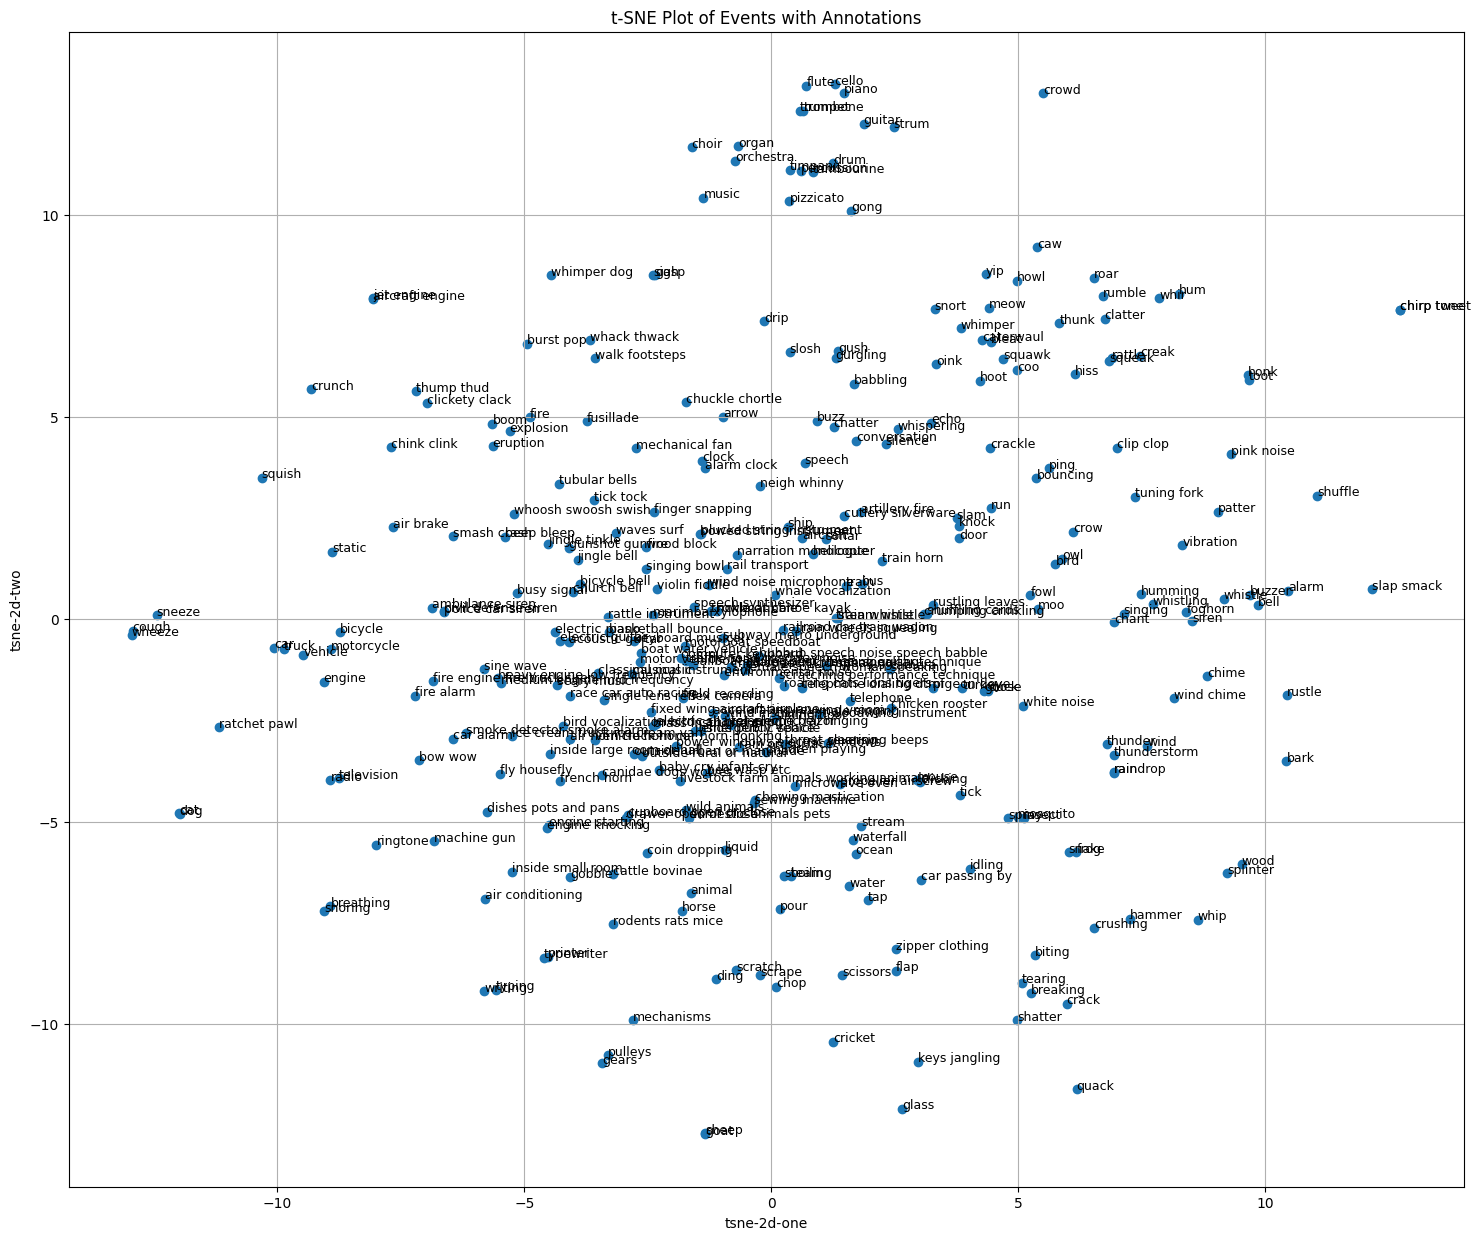

In [39]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(18, 15))
plt.scatter(embedding_df['tsne-2d-one'], embedding_df['tsne-2d-two'], marker='o')

# Annotating each point with the event name
for i, event in embedding_df.iterrows():
    plt.annotate(event['Events'], (event['tsne-2d-one'], event['tsne-2d-two']), fontsize=9)

plt.title('t-SNE Plot of Events with Annotations')
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.savefig('newasc_plus_t-SNE_event_plot.png')
plt.grid(True)

## AIRPORT-EVENT

In [40]:
# Now groupwise representing important events for the scene
airport_df = events_df.groupby("Predicted Label").get_group("airport")
print(airport_df.shape)
airport_df.head()

(311, 7)


Filename Actual Label Predicted Label  \
7     audio/airport-lyon-1169-44100-a.wav      airport         airport   
10  audio/airport-prague-1173-44104-a.wav      airport         airport   
25    audio/airport-lyon-1169-44127-a.wav      airport         airport   
36  audio/airport-prague-1195-44142-a.wav      airport         airport   
41  audio/airport-prague-1195-44149-a.wav      airport         airport   

                                        events_before  \
7   [Clip-clop, Horse, Animal, Speech, Train, Vehi...   
10  [Speech, Animal, Clip-clop, Horse, Domestic an...   
25  [Speech, Clip-clop, Horse, Animal, Run, Male s...   
36  [Speech, Animal, Clip-clop, Horse, Mouse, Vehi...   
41  [Mouse, Music, Speech, Silence, Animal, Inside...   

                                         events_after cam_pred_labels  \
7   [Clip-clop, Horse, Animal, Speech, Train, Vehi...         airport   
10  [Speech, Animal, Horse, Clip-clop, Domestic an...         airport   
25  [Speech, Clip-clop, Horse, Animal, Run, Male s...         airport   
36  [Speech, Animal, Clip-clop, Horse, Mouse, Vehi...         airport   
41  [Mouse, Music, Speech, Silence, Animal, Inside...         airport   

                      not_common  
7                          set()  
10  {'Whimper (dog)', 'Bow-wow'}  
25                         set()  
36                         set()  
41                         set()

In [41]:
airport = airport_df[airport_df['not_common'] != 'set()'].reset_index(drop=True)
all_discarded = []
for discarded in airport["not_common"]:
    discarded = ast.literal_eval(discarded)
    all_discarded.append(discarded)
flattenedlist = list(itertools.chain.from_iterable(all_discarded))
Counter(flattenedlist)

Counter({'Inside, small room': 35,
         'Outside, rural or natural': 34,
         'Walk, footsteps': 32,
         'Clip-clop': 29,
         'Bird': 26,
         'Neigh, whinny': 25,
         'Mouse': 24,
         'Male speech, man speaking': 21,
         'Train': 20,
         'Domestic animals, pets': 19,
         'Pigeon, dove': 18,
         'Livestock, farm animals, working animals': 15,
         'Run': 15,
         'Music': 13,
         'Horse': 12,
         'Bow-wow': 11,
         'Outside, urban or manmade': 11,
         'Arrow': 11,
         'Dog': 11,
         'Boat, Water vehicle': 9,
         'Tick': 9,
         'Tick-tock': 9,
         'Fire': 9,
         'Railroad car, train wagon': 8,
         'Squish': 8,
         'Rail transport': 7,
         'Rustle': 7,
         'Narration, monologue': 7,
         'Coo': 6,
         'Inside, public space': 6,
         'Tap': 5,
         'Basketball bounce': 5,
         'Musical instrument': 5,
         'Vehicle': 4,
         'Inside

In [21]:
samesetairport = airport_df[airport_df['not_common'] == 'set()'].reset_index(drop=True)

In [22]:
print(samesetairport.shape)
samesetairport.head()

(75, 7)


Filename Actual Label Predicted Label  \
0    audio/airport-lyon-1169-44100-a.wav      airport         airport   
1    audio/airport-lyon-1169-44127-a.wav      airport         airport   
2  audio/airport-prague-1195-44142-a.wav      airport         airport   
3  audio/airport-prague-1195-44149-a.wav      airport         airport   
4   audio/airport-milan-1172-44215-a.wav      airport         airport   

                                       events_before  \
0  [Clip-clop, Horse, Animal, Speech, Train, Vehi...   
1  [Speech, Clip-clop, Horse, Animal, Run, Male s...   
2  [Speech, Animal, Clip-clop, Horse, Mouse, Vehi...   
3  [Mouse, Music, Speech, Silence, Animal, Inside...   
4  [Animal, Speech, Clip-clop, Horse, Bow-wow, Do...   

                                        events_after cam_pred_labels  \
0  [Clip-clop, Horse, Animal, Speech, Train, Vehi...         airport   
1  [Speech, Clip-clop, Horse, Animal, Run, Male s...         airport   
2  [Speech, Animal, Clip-clop, Horse, Mouse, Vehi...         airport   
3  [Mouse, Music, Speech, Silence, Animal, Inside...         airport   
4  [Animal, Speech, Clip-clop, Horse, Domestic an...         airport   

  not_common  
0      set()  
1      set()  
2      set()  
3      set()  
4      set()

In [123]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events

airport_df = airport_df.reset_index(drop=True)
# Flatten the list of lists to a single list of events
airport_events = [event for sublist in airport_df['events_after'] for event in sublist]

# Get unique events
unique_events_after = set(airport_events)
print("Total number of unique events_after: ", len(unique_events_after))

Total number of unique events_after:  134


In [124]:
final_events_list = list(airport_events)
import re
def preprocess_event(event):
    # Convert to lowercase
    event = event.lower()
    
    # Replace special characters with space
    event = re.sub(r'[^\w\s]', ' ', event)
    
    # Tokenize and join back
    event = ' '.join(event.split())
    
    return event

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

3110

In [125]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)

In [126]:
embedding_df.loc[embedding_df['Events'] == "firecracker", 'tsne-2d-one'].empty

True

In [127]:
counts = []
tsne_1 = []
tsne_2 = []
for airport_events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == airport_events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == airport_events, 'tsne-2d-two'].item())

airport_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

In [128]:
airport_events_df[airport_events_df['Events'] == 'speech']

Events  Counts    Tsne_1    Tsne_2
3  speech     308  0.676439  3.866248

In [129]:
sorted_df = airport_events_df.sort_values(by = ['Counts'], ascending=False)
sorted_df

Events  Counts    Tsne_1    Tsne_2
3               speech     308  0.676439  3.866248
2               animal     307 -1.635171 -6.761686
5              vehicle     266 -9.474717 -0.891888
1                horse     248 -1.803963 -7.199952
0            clip clop     243  7.005653  4.245914
..                 ...     ...       ...       ...
93   rattle instrument       1 -3.298735  0.055819
94   emergency vehicle       1 -1.419008 -2.768383
96                 moo       1  5.407731  0.266655
103              snort       1  3.308060  7.668475
133           breaking       1  5.266715 -9.245429

[134 rows x 4 columns]

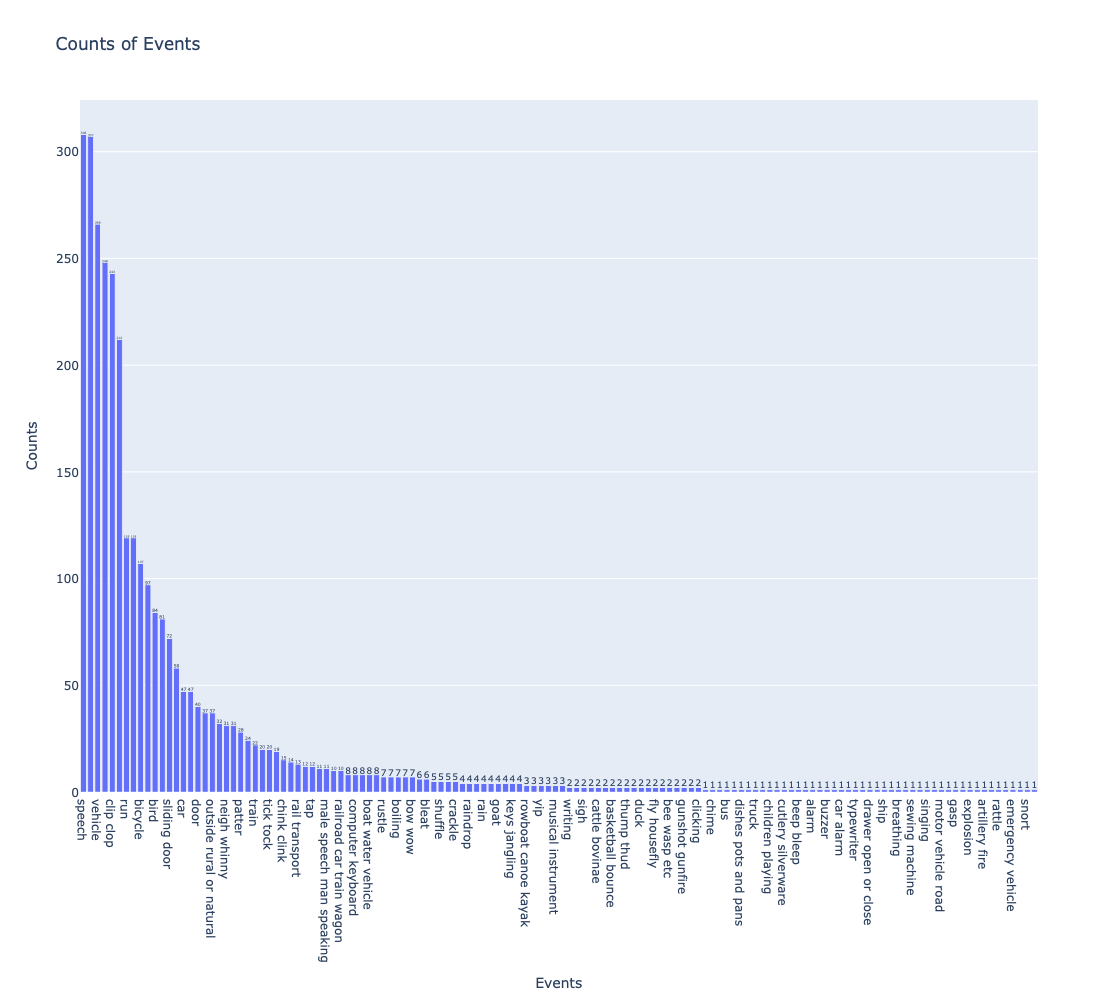

In [130]:
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

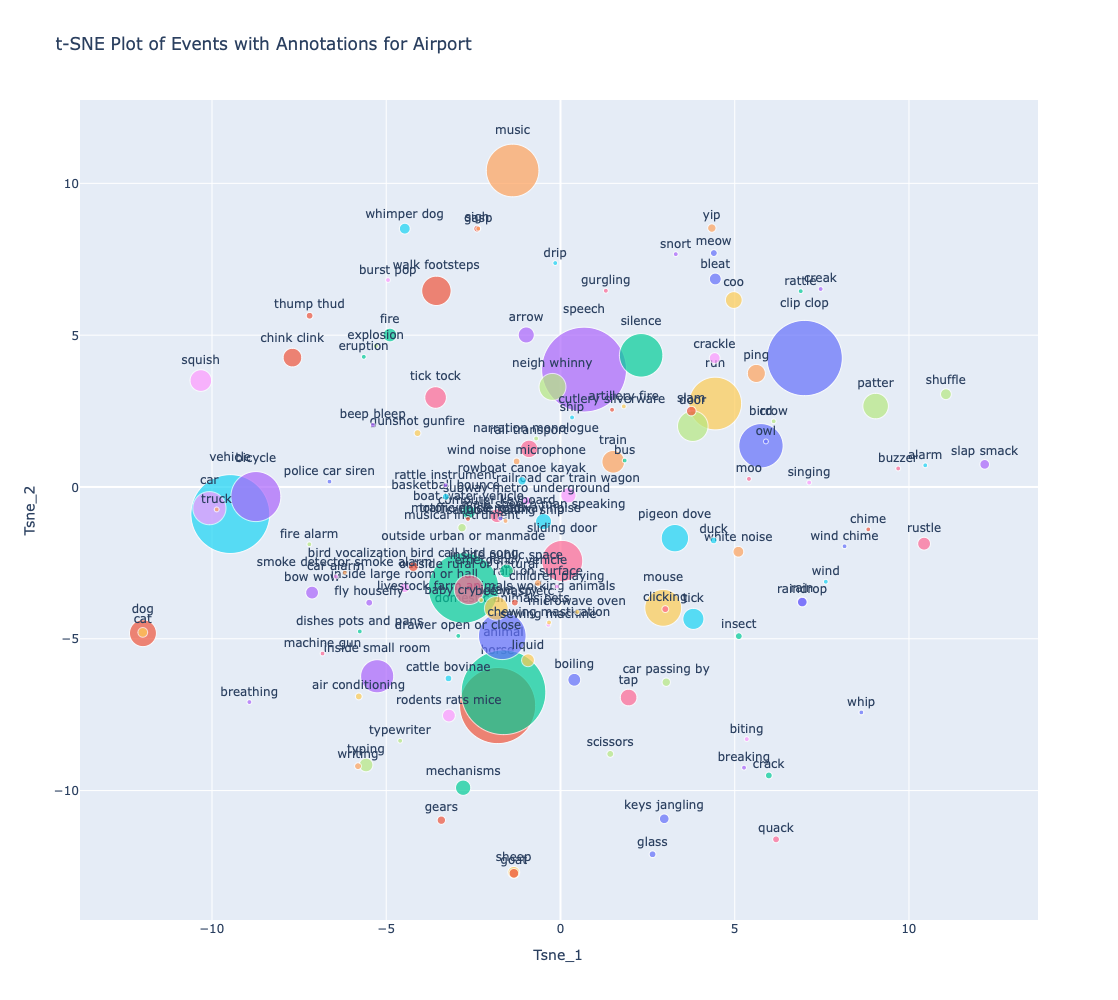

In [131]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    airport_events_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Airport',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()

In [132]:
# We can see there is a huge variation in the occurences of events. Hence we can try and visualize with only a subset of events.
subset_airport_events_df = airport_events_df[airport_events_df['Counts'] >=30].reset_index(drop=True)
subset_airport_events_df.head()

Events  Counts    Tsne_1    Tsne_2
0  clip clop     243  7.005653  4.245914
1      horse     248 -1.803963 -7.199952
2     animal     307 -1.635171 -6.761686
3     speech     308  0.676439  3.866248
4    vehicle     266 -9.474717 -0.891888

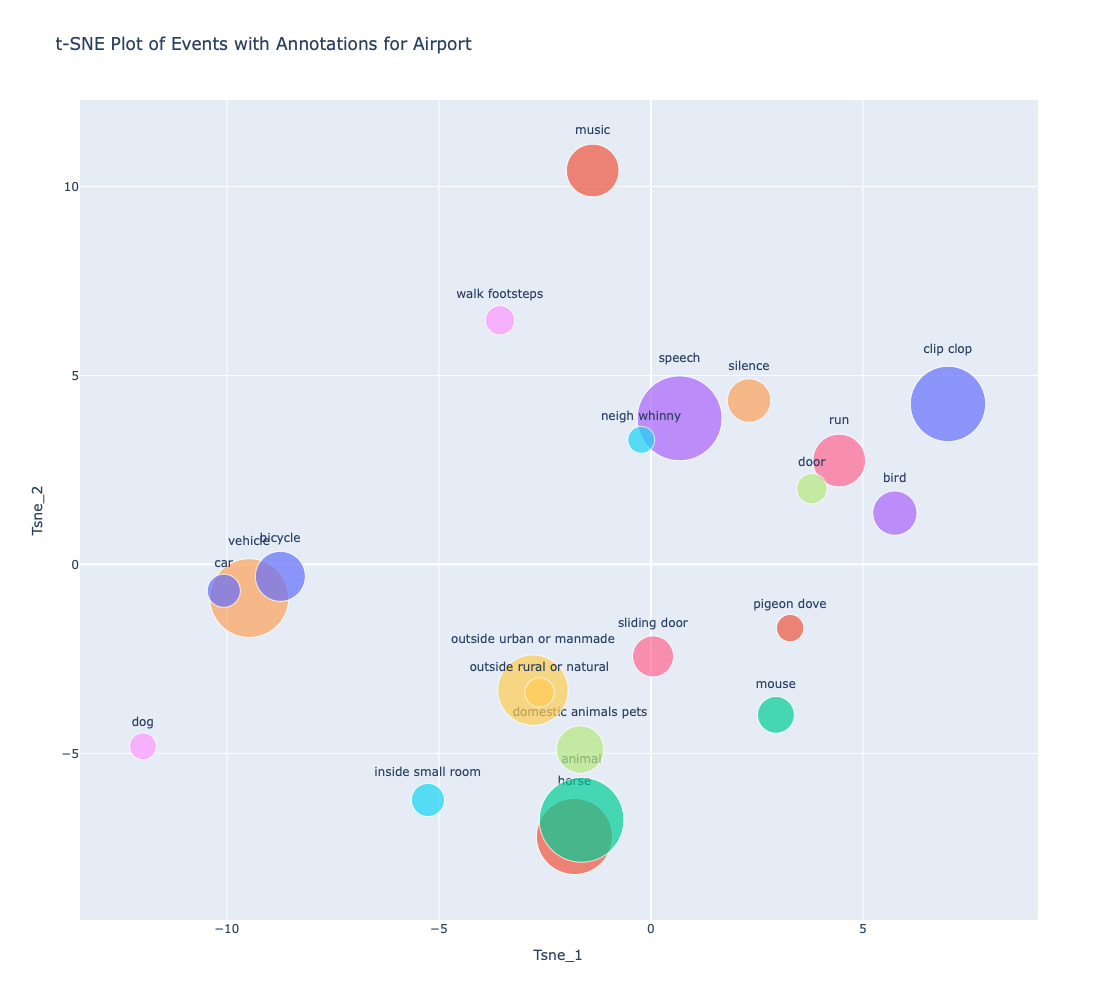

In [133]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_airport_events_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Airport',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()

In [44]:
# for index, row in airport_df.iterrows():
#     if 'Animal' in row['events_after']:
#         print(row['Filename'])

## STREET PEDESTRIAN

In [47]:
# Now groupwise representing important events for the scene street_pedestrian
street_pedestrian_df = events_df.groupby("Predicted Label").get_group("street_pedestrian")
print(street_pedestrian_df.shape)
street_pedestrian_df.head()

(303, 7)


Filename       Actual Label  \
0     audio/street_pedestrian-lyon-1162-44093-a.wav  street_pedestrian   
3    audio/street_pedestrian-milan-1165-44096-a.wav  street_pedestrian   
11  audio/street_pedestrian-lisbon-1174-44105-a.wav  street_pedestrian   
14    audio/street_pedestrian-lyon-1162-44112-a.wav  street_pedestrian   
43   audio/street_pedestrian-milan-1165-44156-a.wav  street_pedestrian   

      Predicted Label                                      events_before  \
0   street_pedestrian  [Speech, Animal, Clip-clop, Horse, Bird, Pigeo...   
3   street_pedestrian  [Speech, Music, Vehicle, Train, Outside, urban...   
11  street_pedestrian  [Speech, Chop, Whip, Arrow, Male speech, man s...   
14  street_pedestrian  [Speech, Clip-clop, Animal, Horse, Vehicle, Ou...   
43  street_pedestrian  [Speech, Animal, Vehicle, Horse, Mouse, Outsid...   

                                         events_after    cam_pred_labels  \
0   [Speech, Animal, Horse, Clip-clop, Bird, Outsi...  street_pedestrian   
3   [Speech, Music, Vehicle, Animal, Clip-clop, Ou...  street_pedestrian   
11  [Speech, Slap, smack, Arrow, Basketball bounce...  street_pedestrian   
14  [Speech, Animal, Clip-clop, Horse, Vehicle, Ou...  street_pedestrian   
43  [Speech, Animal, Vehicle, Horse, Mouse, Outsid...  street_pedestrian   

                                         not_common  
0                           {'Pigeon, dove', 'Coo'}  
3   {'Rail transport', 'Railroad car, train wagon'}  
11                 {'Narration, monologue', 'Ping'}  
14            {'Outside, rural or natural', 'Fire'}  
43                                            set()

In [48]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events
street_pedestrian_df = street_pedestrian_df.reset_index(drop=True)

# Flatten the list of lists to a single list of events
street_pedestrian_events = [event for sublist in street_pedestrian_df['events_after'] for event in sublist]
print("Total number of events: ", len(street_pedestrian_events))

# Get unique events
unique_events_after = set(street_pedestrian_events)
print("Total number of unique events_after: ", len(unique_events_after))

final_events_list = list(street_pedestrian_events)

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

Total number of events:  3030
Total number of unique events_after:  128


3030

In [49]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)
eventcount['speech']

300

In [50]:
counts = []
tsne_1 = []
tsne_2 = []
for events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-two'].item())

street_pedestrian_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

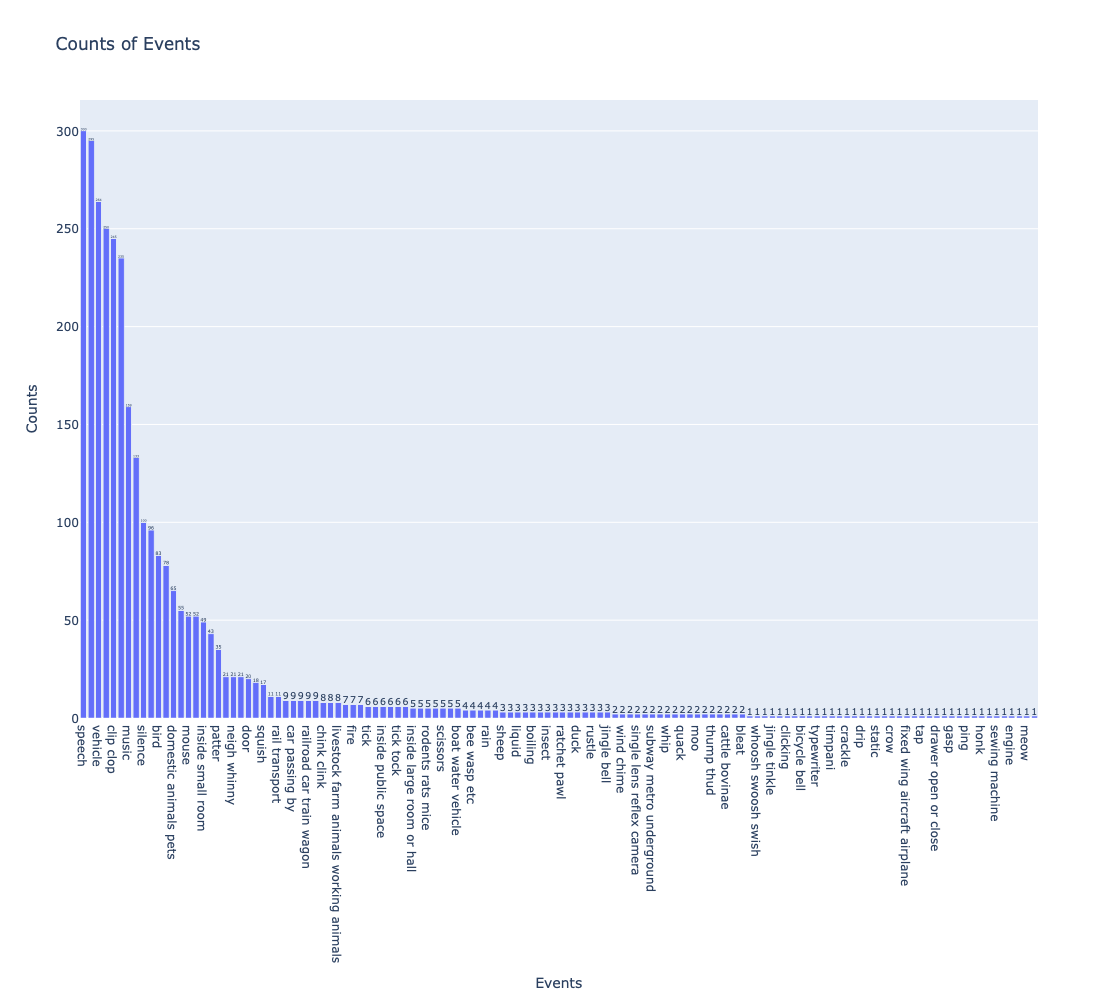

In [51]:
sorted_df = street_pedestrian_events_df.sort_values(by = ['Counts'], ascending=False)


#Plot
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

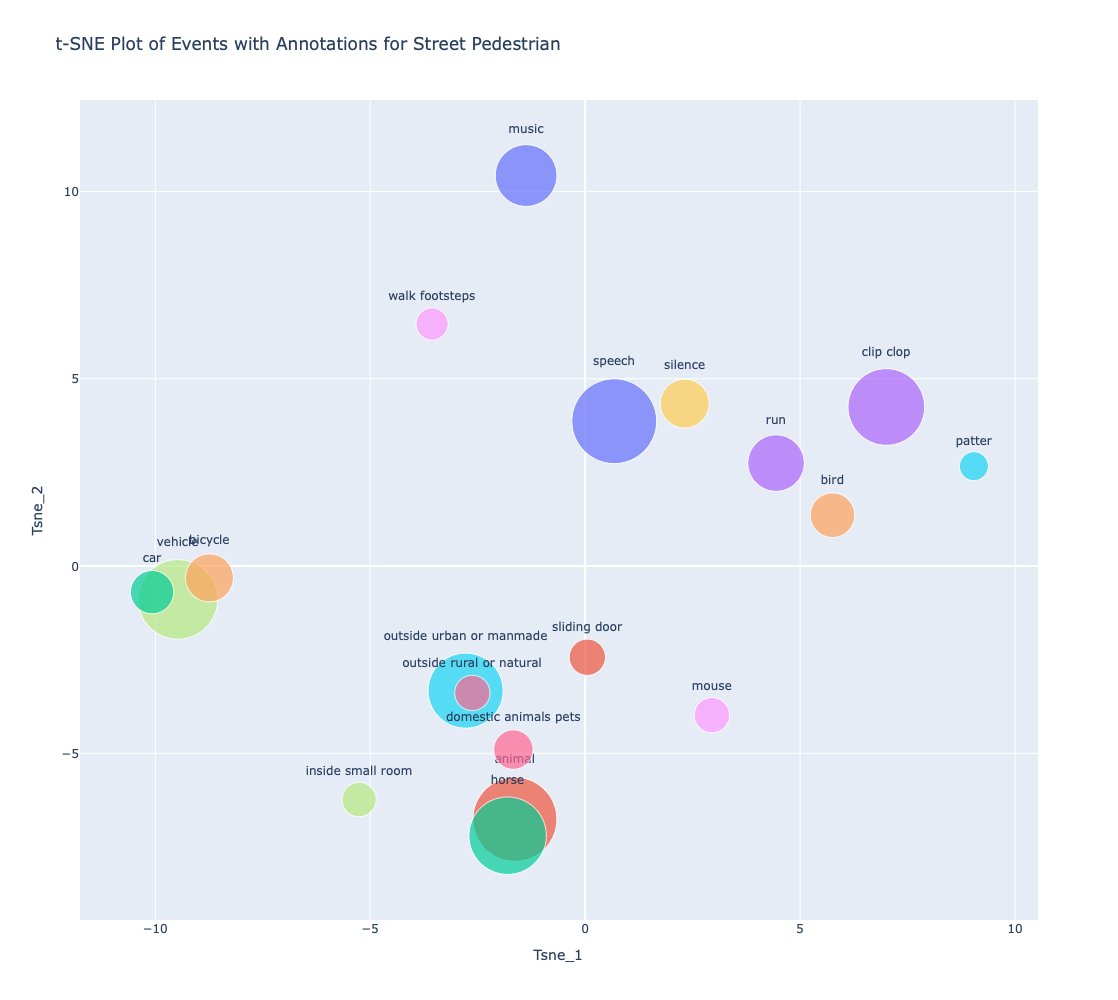

In [52]:
# Out of 305 audios in the street_pedestrian group there are many events below the occurence of 9 which we can remove and see
subset_street_pedestrian_events_df= street_pedestrian_events_df[street_pedestrian_events_df['Counts'] >=30].reset_index(drop=True)


# Plot
# dropping events less than 10
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_street_pedestrian_events_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Street Pedestrian',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()


airport scene has a more concentrated human activity cluster, possibly due to the confined spaces and higher density of people.

inside large room sounds are not there unlike airport

"speech," "vehicle," and "walk footsteps" are central in both scenes, highlighting the nature of human-dominated environments.


## TRAM

In [53]:
# Now groupwise representing important events for the scene tram
tram_df = events_df.groupby("Predicted Label").get_group("tram")

tram_df.head()
# tram_df = tram_df[tram_df['cam_pred_labels'] == 'tram']
print(tram_df.shape)

(341, 7)


In [54]:
#Getting all the event the model tries to ignore for tram
all_ignored = []
for ignored_events in tram_df['not_common']:
    ignored_events = ast.literal_eval(ignored_events)
    all_ignored.append(list(ignored_events))
flattenedlist = list(itertools.chain.from_iterable(all_ignored))
Counter(flattenedlist)

Counter({'Inside, small room': 49,
         'Railroad car, train wagon': 43,
         'Train': 43,
         'Subway, metro, underground': 41,
         'Rail transport': 40,
         'Field recording': 22,
         'Mouse': 21,
         'Animal': 18,
         'Cupboard open or close': 16,
         'Male speech, man speaking': 15,
         'Bird': 15,
         'Outside, urban or manmade': 14,
         'Aircraft': 14,
         'Pigeon, dove': 13,
         'Air brake': 12,
         'Speech': 12,
         'Outside, rural or natural': 11,
         'Narration, monologue': 11,
         'Music': 11,
         'Clip-clop': 11,
         'Horse': 10,
         'Drawer open or close': 10,
         'Musical instrument': 10,
         'Ship': 9,
         'Bus': 9,
         'Truck': 8,
         'Inside, large room or hall': 8,
         'Dog': 8,
         'Writing': 8,
         'Sliding door': 8,
         'Domestic animals, pets': 7,
         'Arrow': 6,
         'Coo': 5,
         'Train wheels squealing

In [55]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events
tram_df = tram_df.reset_index(drop=True)

# Flatten the list of lists to a single list of events
tram_events = [event for sublist in tram_df['events_after'] for event in sublist]
print("Total number of events: ", len(tram_events))

# Get unique events
unique_events_after = set(tram_events)
print("Total number of unique events_after: ", len(unique_events_after))

final_events_list = list(tram_events)

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

Total number of events:  3410
Total number of unique events_after:  166


3410

In [56]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)
print("speech :", eventcount['speech'])




counts = []
tsne_1 = []
tsne_2 = []
for events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-two'].item())

tram_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

sorted_df = tram_events_df.sort_values(by = ['Counts'], ascending=False)

speech : 315


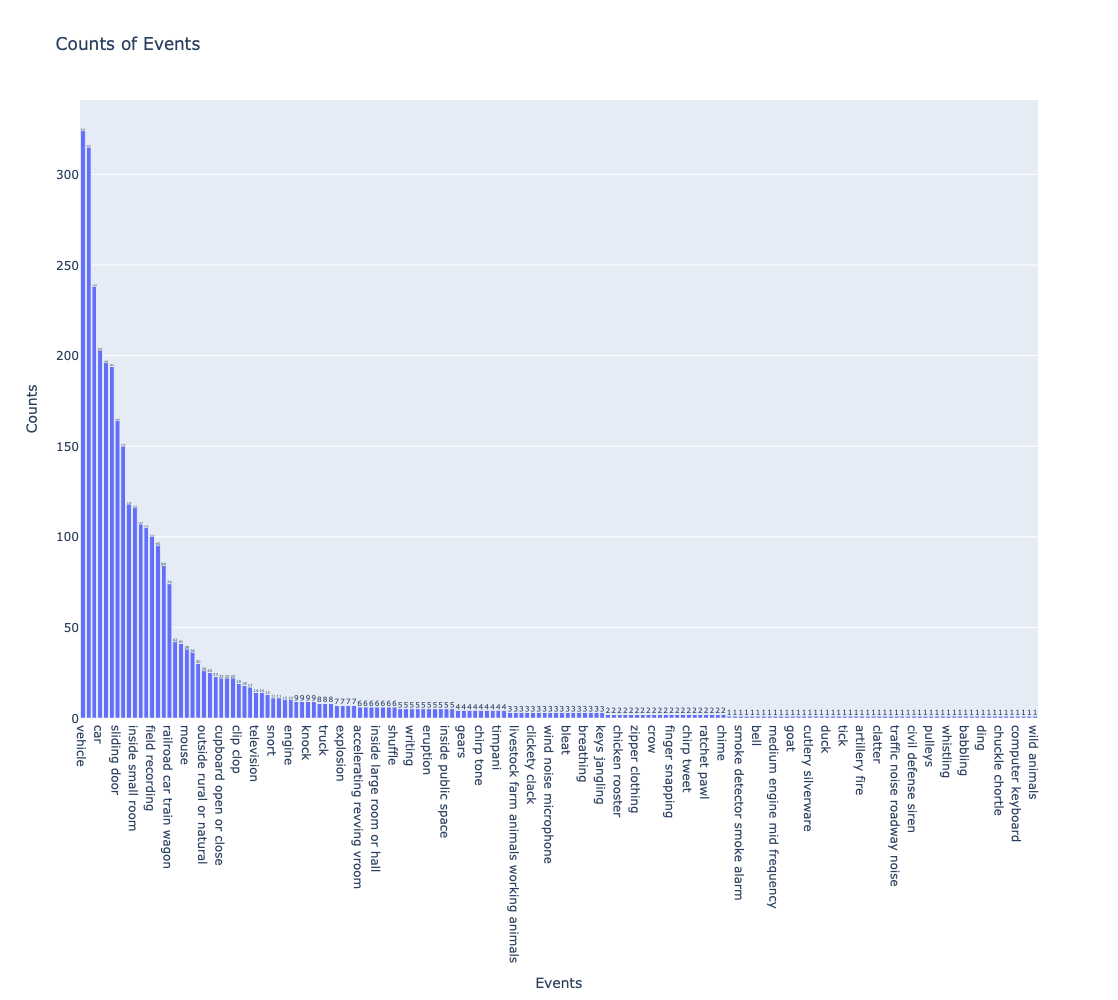

In [57]:
#Plot
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

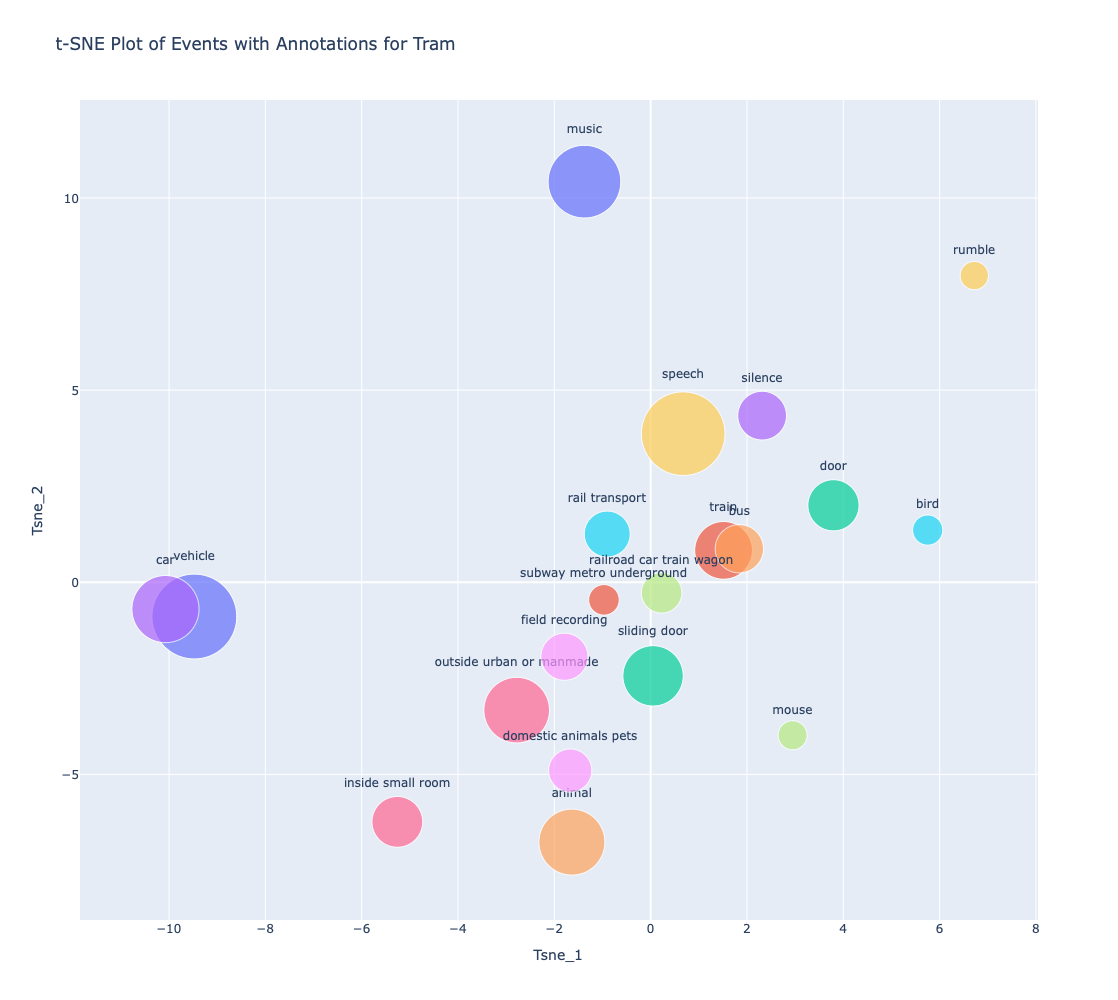

In [58]:
subset_tram_df = tram_events_df[tram_events_df['Counts'] >=34].reset_index(drop=True)


# Plot
# dropping events less than 10
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_tram_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Tram',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()

Model tends to focus on active events like rumble, door, tram, railroad, wagon, bus, or some cluster of vehicle related sounds, which is different
from those of airport and street pedestrian. The model also focuses on indoor events.

In [59]:
# array(['airport', 'bus', 'metro', 'metro_station', 'park',
#        'public_square', 'shopping_mall', 'street_pedestrian',
#        'street_traffic', 'tram'], dtype=object)

## METRO STATION

In [60]:
# Now groupwise representing important events for the scene street_pedestrian
metro_station_df = events_df.groupby("Predicted Label").get_group("metro_station")
print(metro_station_df.shape)
metro_station_df.head()

(334, 7)


Filename   Actual Label  \
5     audio/metro_station-lyon-1167-44098-a.wav  metro_station   
8   audio/metro_station-prague-1170-44101-a.wav  metro_station   
12    audio/metro_station-lyon-1167-44107-a.wav  metro_station   
15    audio/metro_station-lyon-1167-44113-a.wav  metro_station   
23   audio/metro_station-milan-1187-44123-a.wav  metro_station   

   Predicted Label                                      events_before  \
5    metro_station  [Speech, Music, Vehicle, Outside, urban or man...   
8    metro_station  [Train, Vehicle, Railroad car, train wagon, Ra...   
12   metro_station  [Speech, Animal, Vehicle, Mouse, Domestic anim...   
15   metro_station  [Speech, Music, Animal, Clip-clop, Horse, Run,...   
23   metro_station  [Speech, Vehicle, Train, Snort, Rail transport...   

                                         events_after cam_pred_labels  \
5   [Speech, Music, Vehicle, Outside, urban or man...   metro_station   
8   [Vehicle, Train, Rail transport, Railroad car,...   metro_station   
12  [Speech, Animal, Vehicle, Mouse, Domestic anim...   metro_station   
15  [Speech, Music, Animal, Horse, Clip-clop, Outs...   metro_station   
23  [Speech, Vehicle, Snort, Car, Outside, urban o...   metro_station   

                                           not_common  
5                                               set()  
8   {'Air brake', 'Music', 'Field recording', 'Tra...  
12  {'Inside, small room', 'Outside, urban or manm...  
15                           {'Pigeon, dove', 'Bird'}  
23  {'Boat, Water vehicle', 'Rail transport', 'Tra...

In [61]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events
metro_station_df = metro_station_df.reset_index(drop=True)

# Flatten the list of lists to a single list of events
metro_station_events = [event for sublist in metro_station_df['events_after'] for event in sublist]
print("Total number of events: ", len(metro_station_events))

# Get unique events
unique_events_after = set(metro_station_events)
print("Total number of unique events_after: ", len(unique_events_after))

final_events_list = list(metro_station_events)

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

Total number of events:  3340
Total number of unique events_after:  152


3340

In [62]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)
print("speech :", eventcount['speech'])




counts = []
tsne_1 = []
tsne_2 = []
for events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-two'].item())

metro_station_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

sorted_df = metro_station_events_df.sort_values(by = ['Counts'], ascending=False)

speech : 285


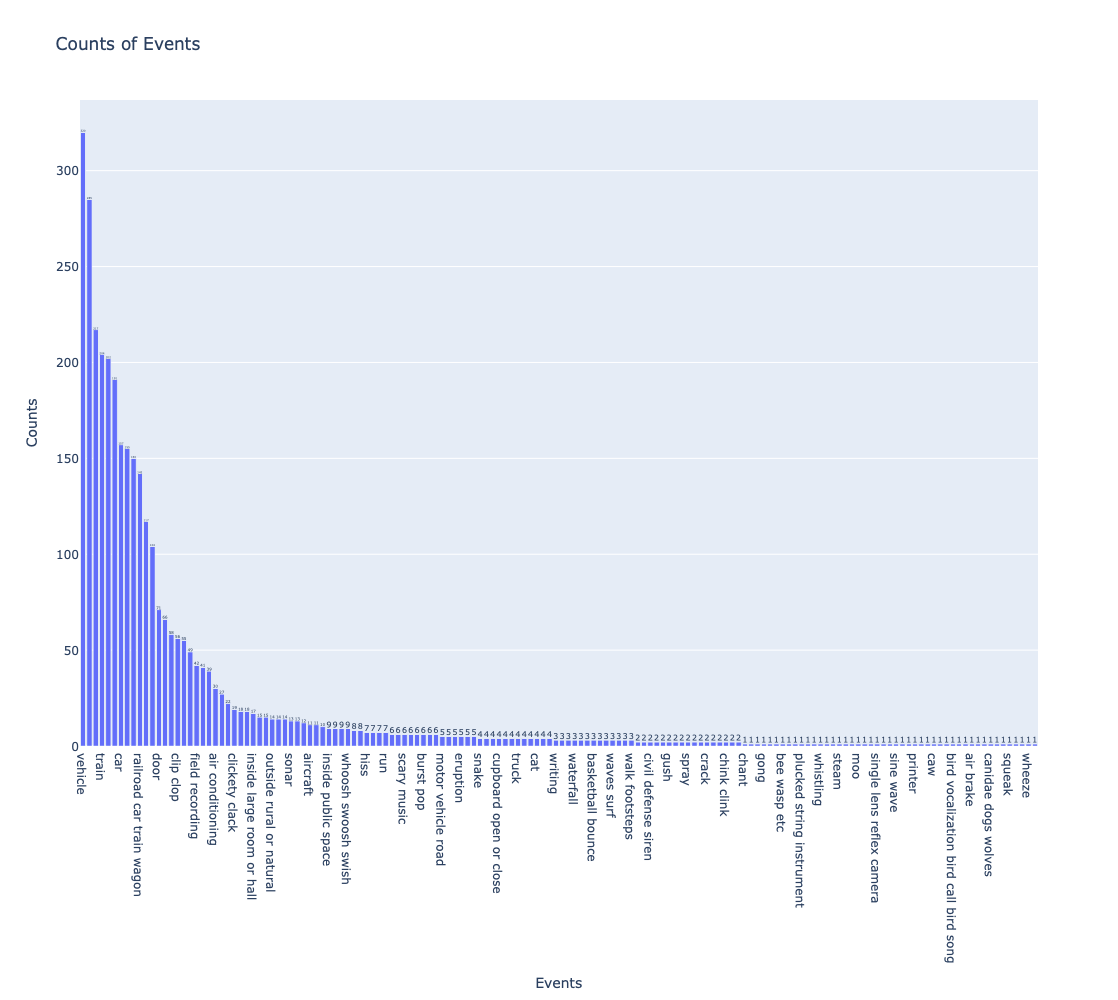

In [63]:
#Plot
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

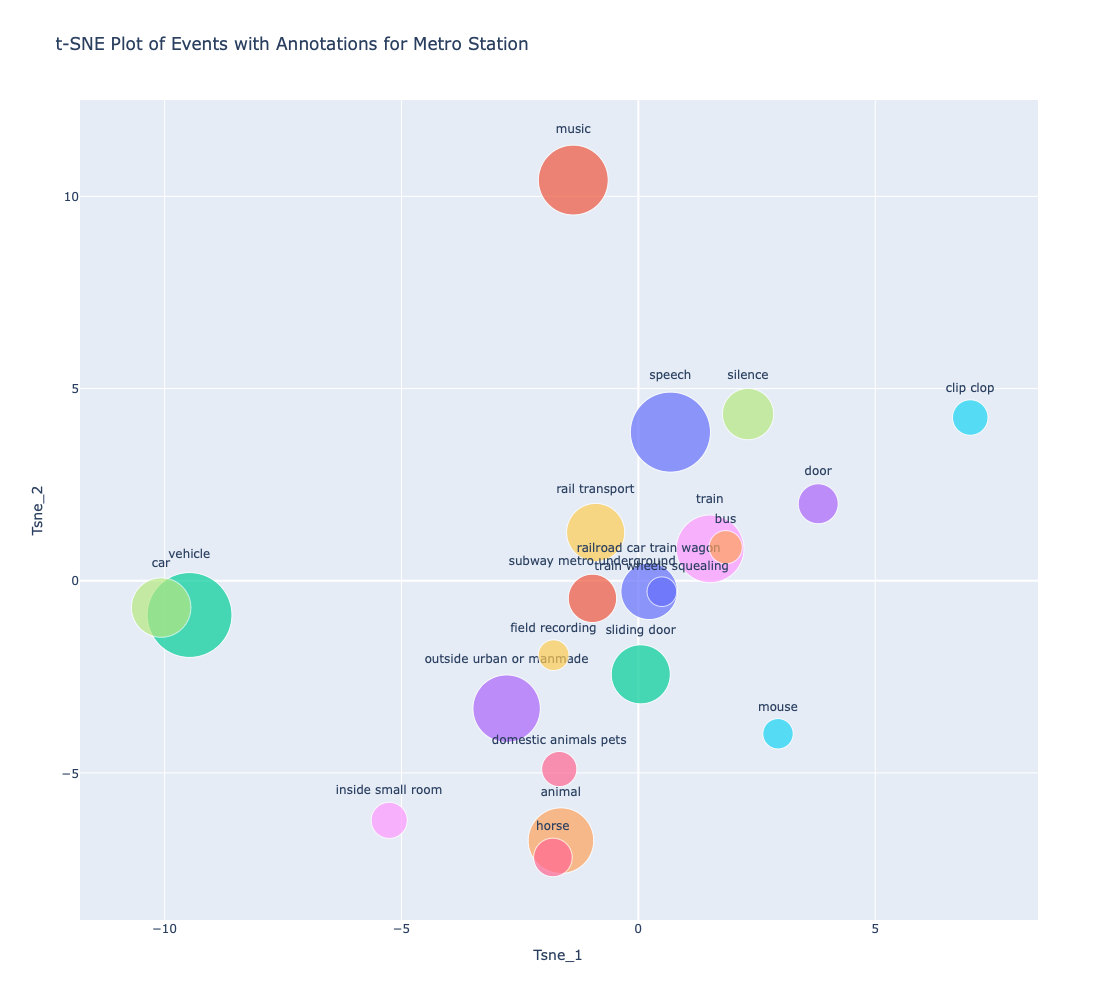

In [64]:
subset_metro_station_df = metro_station_events_df[metro_station_events_df['Counts'] >=33].reset_index(drop=True)


# Plot
# dropping events less than 10
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_metro_station_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Metro Station',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()

Major contributor events are related to vehicle categories, outside urban or man made, door sounds, speech, music, subway metro underground which do sound like a metro station.

## STREET TRAFFIC

In [65]:
# Now groupwise representing important events for the scene street_traffic
street_traffic_df = events_df.groupby("Predicted Label").get_group("street_traffic")
print(street_traffic_df.shape)
street_traffic_df.head()

(362, 7)


Filename    Actual Label  \
4    audio/street_traffic-milan-1166-44097-a.wav  street_traffic   
9   audio/street_traffic-lisbon-1171-44102-a.wav  street_traffic   
30  audio/street_traffic-prague-1193-44135-a.wav  street_traffic   
49  audio/street_traffic-prague-1193-44163-a.wav  street_traffic   
58  audio/street_traffic-lisbon-1171-44176-a.wav  street_traffic   

   Predicted Label                                      events_before  \
4   street_traffic  [Vehicle, Train, Speech, Railroad car, train w...   
9   street_traffic  [Vehicle, Cupboard open or close, Hammer, Dish...   
30  street_traffic  [Vehicle, Silence, Sonar, White noise, Outside...   
49  street_traffic  [Vehicle, Outside, rural or natural, Silence, ...   
58  street_traffic  [Vehicle, Truck, Car, Air brake, Bus, Motor ve...   

                                         events_after cam_pred_labels  \
4   [Vehicle, Silence, Car, Speech, Train, Outside...  street_traffic   
9   [Vehicle, Car, Sliding door, Door, Dishes, pot...  street_traffic   
30  [Vehicle, Silence, Sonar, Train, Outside, rura...  street_traffic   
49  [Vehicle, Silence, Outside, rural or natural, ...  street_traffic   
58  [Vehicle, Car, Bus, Truck, Engine, Motor vehic...  street_traffic   

                                           not_common  
4                 {'White noise', 'Ship', 'Aircraft'}  
9   {'Train', 'Cupboard open or close', 'Truck', '...  
30                                          {'Music'}  
49            {'Eruption', 'White noise', 'Aircraft'}  
58  {'Traffic noise, roadway noise', 'Outside, urb...

In [66]:
# Get all unique events in column events_after and plot them using their tsne coordinates. 
# Increase the marker shape based on count of the events
street_traffic_df = street_traffic_df.reset_index(drop=True)

# Flatten the list of lists to a single list of events
street_traffic_events = [event for sublist in street_traffic_df['events_after'] for event in sublist]
print("Total number of events: ", len(street_traffic_events))

# Get unique events
unique_events_after = set(street_traffic_events)
print("Total number of unique events_after: ", len(unique_events_after))

final_events_list = list(street_traffic_events)

# Preprocess events
final_events_list = [preprocess_event(event) for event in final_events_list]
len(final_events_list)

Total number of events:  3620
Total number of unique events_after:  117


3620

In [67]:
# Count all the occurences of the events
from collections import Counter
eventcount = Counter(final_events_list)
print("speech :", eventcount['speech'])




counts = []
tsne_1 = []
tsne_2 = []
for events, count in eventcount.items():
    counts.append(count)
    tsne_1.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-one'].item())
    tsne_2.append(embedding_df.loc[embedding_df['Events'] == events, 'tsne-2d-two'].item())

street_traffic_events_df = pd.DataFrame({
    "Events":list(eventcount.keys()),
    "Counts":counts,
    "Tsne_1":tsne_1,
    "Tsne_2":tsne_2
})

sorted_df = street_traffic_events_df.sort_values(by = ['Counts'], ascending=False)

speech : 181


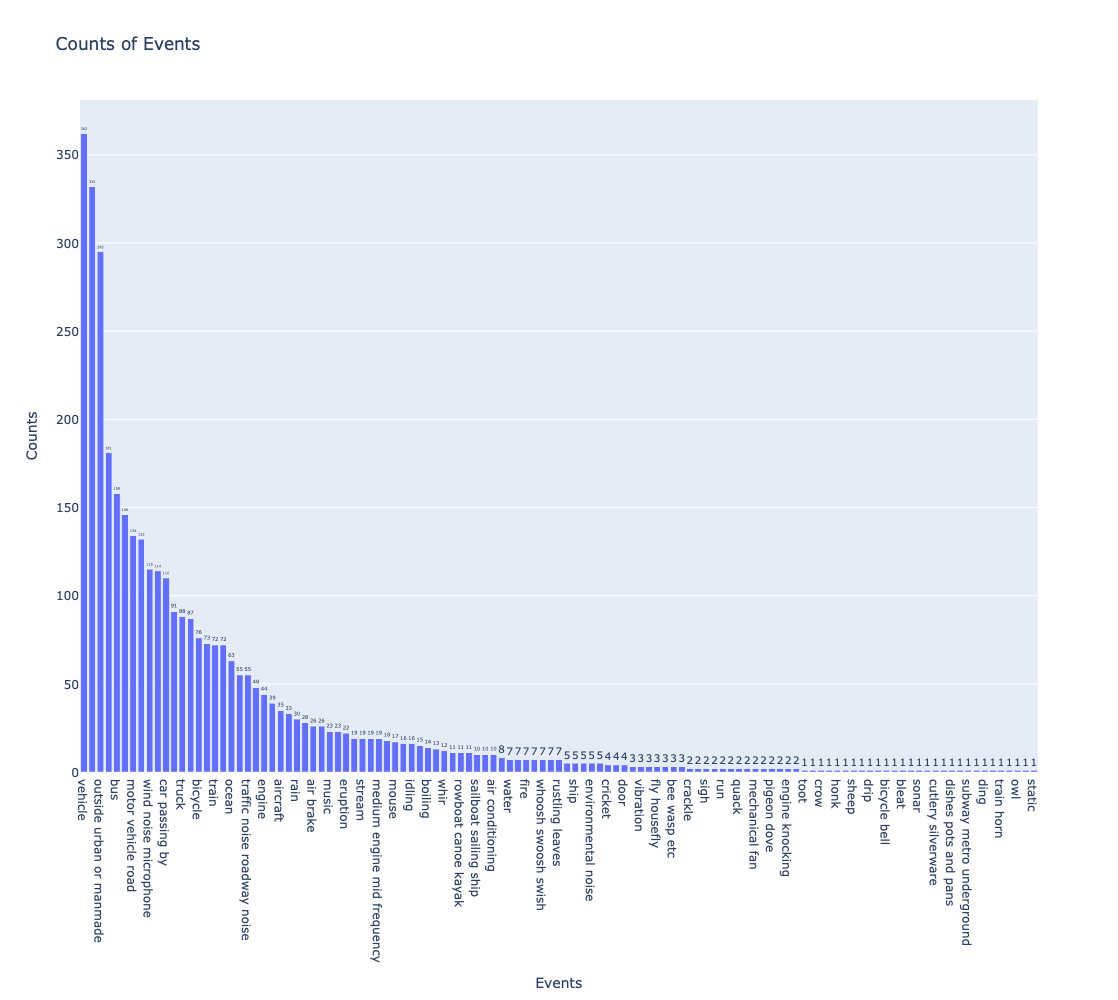

In [68]:
#Plot
import plotly.express as px
# Create a bar plot using Plotly
fig = px.bar(
    sorted_df,
    x='Events',
    y='Counts',
    title='Counts of Events',
    text='Counts'
)

# Update the layout to make the text annotations more readable
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Events',
    yaxis_title='Counts',
    height = 1000,
    width = 1000,
    showlegend=False  # Hide the legend
)

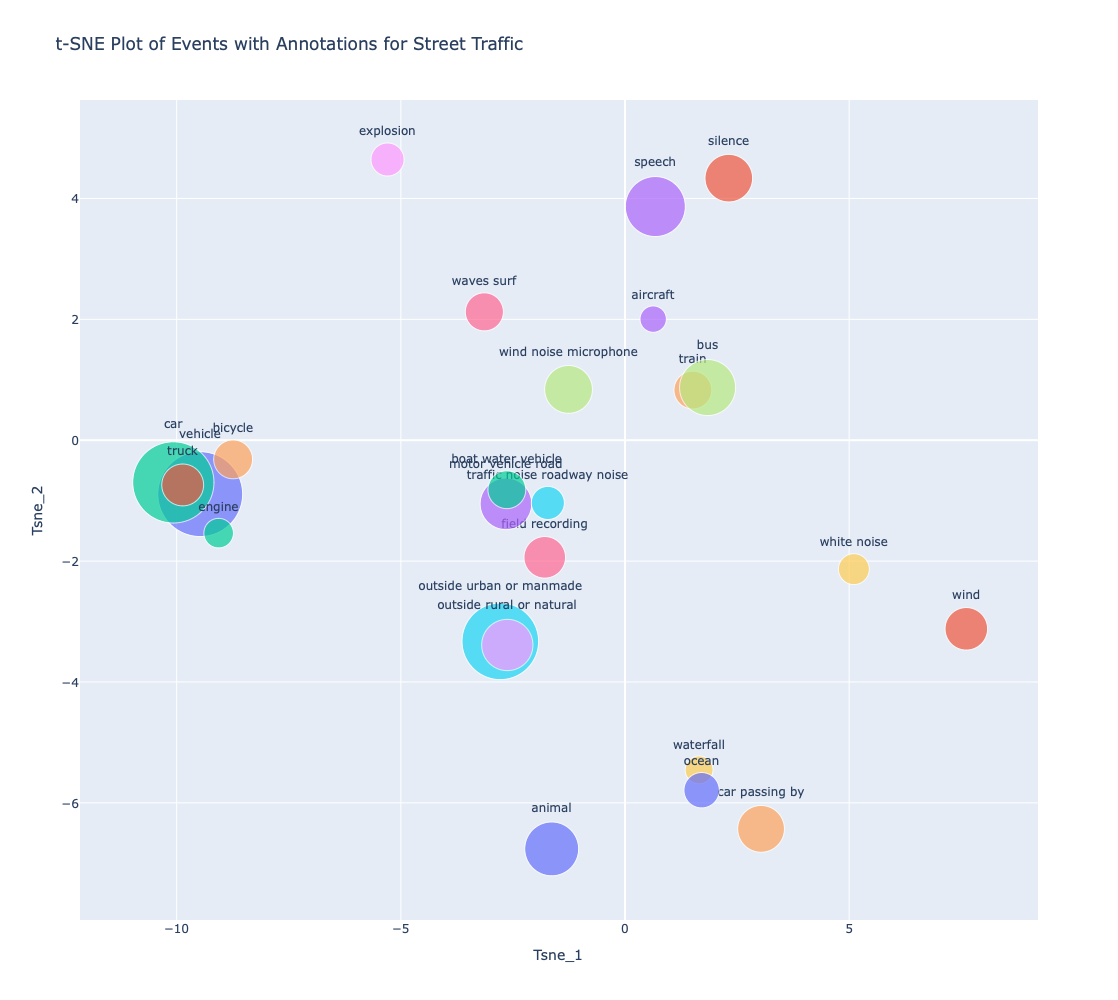

In [69]:
subset_street_traffic_events_df = street_traffic_events_df[street_traffic_events_df['Counts'] >=35].reset_index(drop=True)


# Plot
# dropping events less than 10
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    subset_street_traffic_events_df,
    x='Tsne_1',
    y='Tsne_2',
    size='Counts',
    color='Events',
    hover_name='Events',
    text='Events',
    title='Scatter Plot of Events with t-SNE Coordinates',
    size_max=60  # Control the maximum size of the bubbles
)

# Update the layout to make the text annotations more readable
fig.update_traces(textposition='top center')

fig.update_layout(
    title='t-SNE Plot of Events with Annotations for Street Traffic',
    xaxis_title='Tsne_1',
    yaxis_title='Tsne_2',
    showlegend=False,  # Hide the legend if it overlaps with the bubbles
    height = 1000,
    width = 1000,
)

# Show the plot
fig.show()